In [1]:
import pandas as pd

In [2]:
taiex = pd.read_csv('taiex.csv')

In [3]:
Close=taiex.Close
Close.head(3)

0    8612.54
1    8546.54
2    8500.01
Name: Close, dtype: float64

In [4]:
Close.index=pd.to_datetime(taiex.Date) #todatetime認定為時間序列
Close.head(10)

Date
2014-01-02    8612.54
2014-01-03    8546.54
2014-01-06    8500.01
2014-01-07    8512.30
2014-01-08    8556.01
2014-01-09    8514.68
2014-01-10    8529.35
2014-01-13    8566.20
2014-01-14    8548.14
2014-01-15    8602.55
Name: Close, dtype: float64

<Axes: xlabel='Date'>

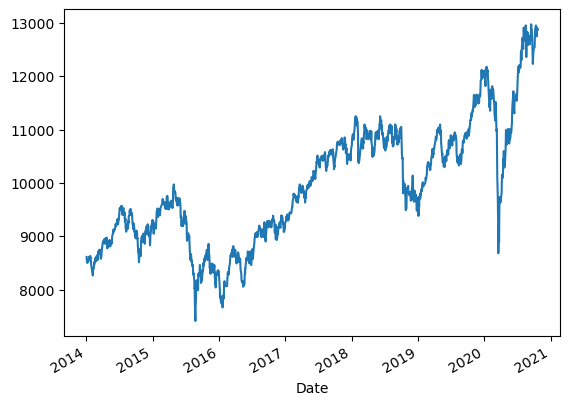

In [5]:
#畫圖
import matplotlib.pyplot as plt
Close.plot()

In [6]:
#選擇特定時間點的股價
ClosePart1=Close["2015-01-01":"2015-12-31"]
ClosePart1

Date
2015-01-05    9274.11
2015-01-06    9048.34
2015-01-07    9080.09
2015-01-08    9238.03
2015-01-09    9215.58
               ...   
2015-12-25    8363.28
2015-12-28    8358.49
2015-12-29    8293.91
2015-12-30    8279.99
2015-12-31    8338.06
Name: Close, Length: 244, dtype: float64

In [7]:
#基本統計量
Close.describe()

count     1665.000000
mean      9945.331063
std       1150.410135
min       7410.340000
25%       9045.980000
50%       9797.090000
75%      10788.510000
max      12976.760000
Name: Close, dtype: float64

In [8]:
#計算報酬率
#shift(1)表示前一期
taiexRet=(Close-Close.shift(1))/Close.shift(1)
taiexRet

Date
2014-01-02         NaN
2014-01-03   -0.007663
2014-01-06   -0.005444
2014-01-07    0.001446
2014-01-08    0.005135
                ...   
2020-10-15   -0.007082
2020-10-16   -0.006038
2020-10-19    0.012389
2020-10-20   -0.003561
2020-10-21    0.001157
Name: Close, Length: 1665, dtype: float64

<Axes: xlabel='Date'>

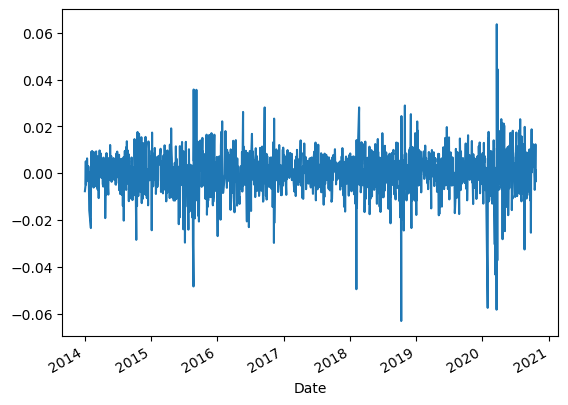

In [9]:
#看平均數是否穩定
taiexRet.plot()

In [10]:
#計算自相關係數ACF
from statsmodels.tsa import stattools

In [11]:
acfs=stattools.acf(Close)
acfs

array([1.        , 0.99462818, 0.98921491, 0.98326363, 0.97734054,
       0.97138797, 0.96552183, 0.95963524, 0.95366561, 0.94773402,
       0.94217351, 0.93676969, 0.931398  , 0.92629245, 0.92105683,
       0.91598094, 0.91096472, 0.90596459, 0.90075948, 0.89520102,
       0.88948156, 0.88369861, 0.8779351 , 0.8721146 , 0.86632055,
       0.86066017, 0.85535693, 0.85005062, 0.84503836, 0.84023272,
       0.83523512, 0.82997265, 0.82448263])

In [12]:
#用星星表示下載全部模組的套件
from statsmodels.graphics.tsaplots import *

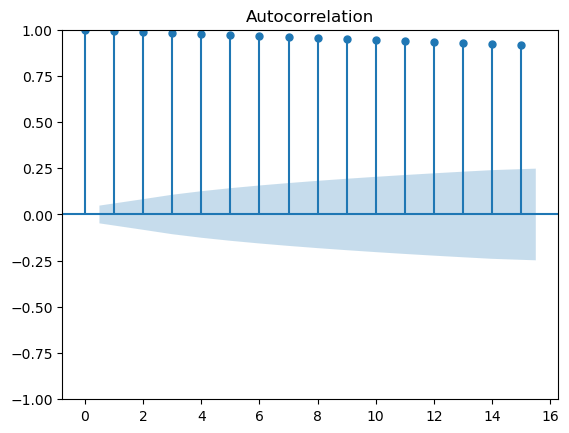

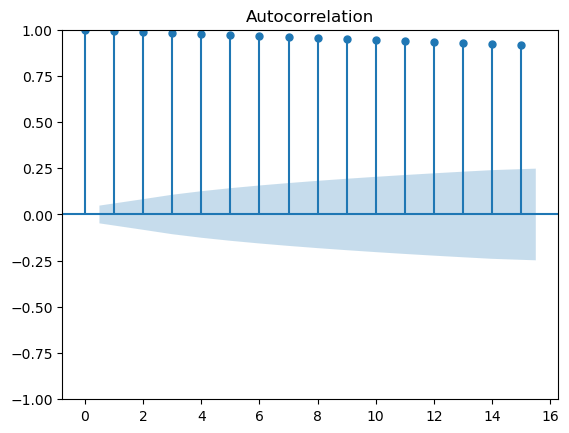

In [13]:
#結果表示不穩定因為容易受間接效果影響
plot_acf(Close,lags=15)

In [14]:
taiexRet=taiexRet.dropna()
taiexRet

Date
2014-01-03   -0.007663
2014-01-06   -0.005444
2014-01-07    0.001446
2014-01-08    0.005135
2014-01-09   -0.004831
                ...   
2020-10-15   -0.007082
2020-10-16   -0.006038
2020-10-19    0.012389
2020-10-20   -0.003561
2020-10-21    0.001157
Name: Close, Length: 1664, dtype: float64

In [15]:
acf_ret=stattools.acf(taiexRet)
acf_ret

array([ 1.        , -0.00145094,  0.07182076,  0.0350672 , -0.01969735,
       -0.0453634 , -0.01325262,  0.01899992,  0.01579524, -0.02140429,
       -0.01258452,  0.02316697, -0.0430115 ,  0.01741765, -0.02197829,
        0.03143036, -0.00985026, -0.04852338,  0.02739491, -0.01675118,
        0.00797097, -0.00382073, -0.00218877,  0.032079  , -0.00677273,
       -0.03272572, -0.01180819, -0.02498069, -0.04203166,  0.02685647,
        0.03644388,  0.01500363,  0.0239564 ])

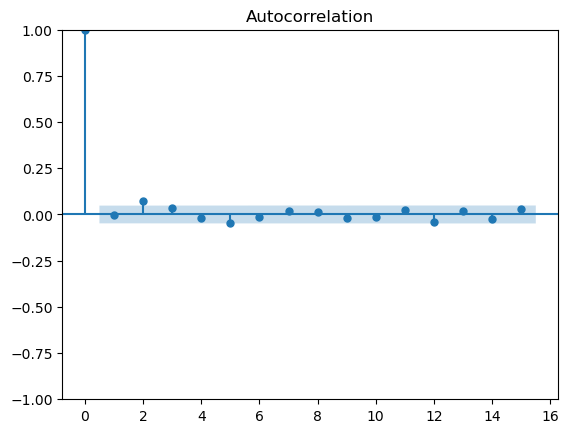

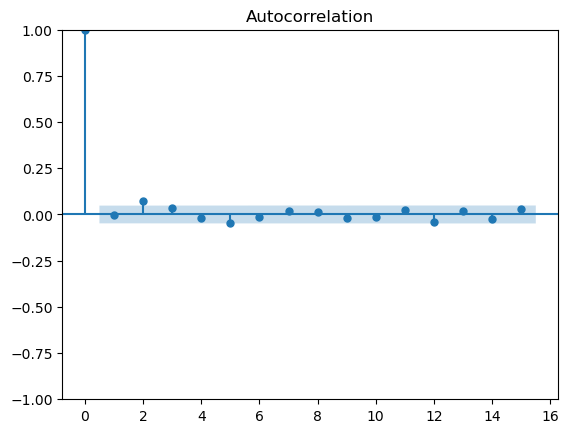

In [16]:
plot_acf(taiexRet,lags=15)

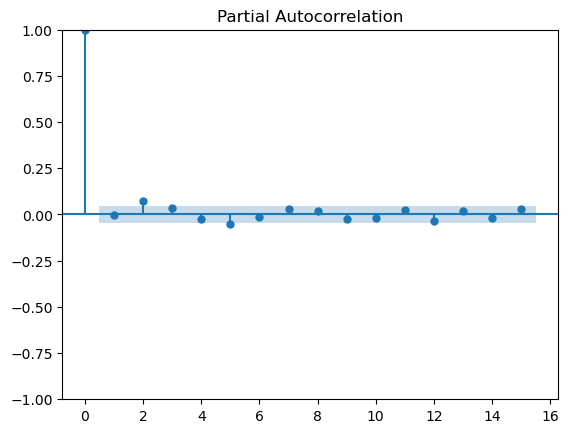

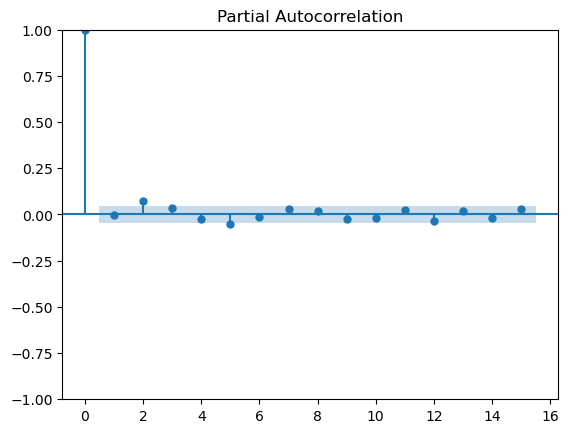

In [17]:
plot_pacf(taiexRet,lags=15)

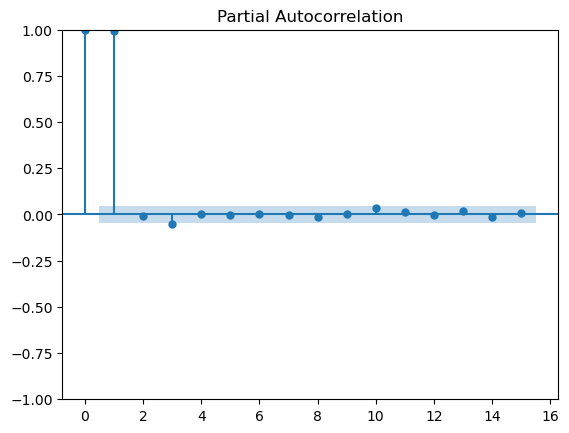

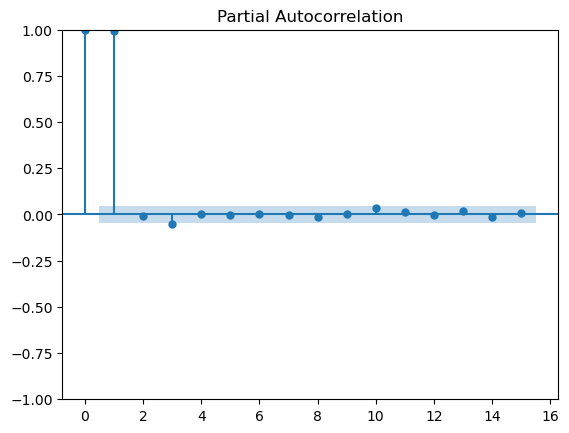

In [38]:
plot_pacf(Close,lags=15)

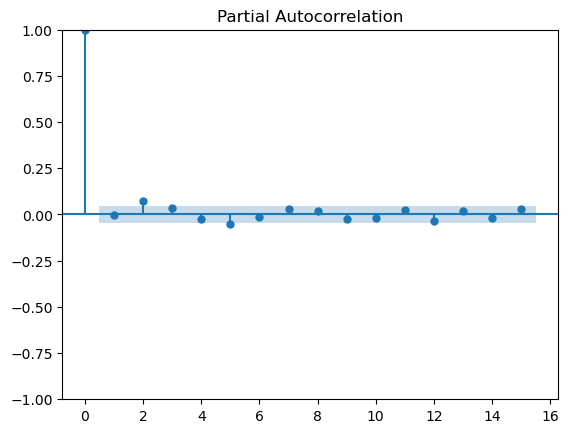

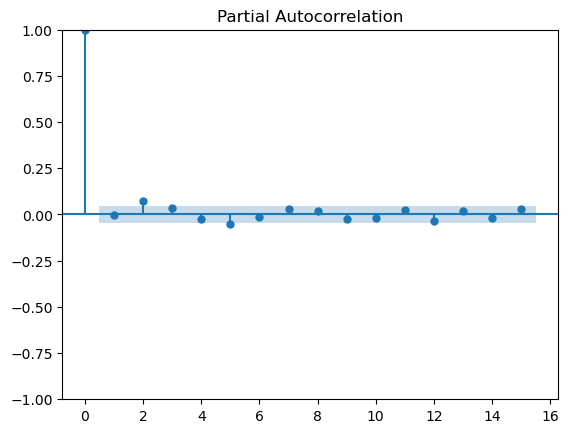

In [18]:
plot_pacf(taiexRet,lags=15)

In [19]:
pacf_ret=stattools.pacf(taiexRet)
pacf_ret

array([ 1.        , -0.00145181,  0.07190523,  0.03551552, -0.02489012,
       -0.05109317, -0.01176726,  0.02800503,  0.02128673, -0.02636277,
       -0.02071628,  0.0254496 , -0.03606592,  0.0163887 , -0.02139222,
        0.03056267, -0.0069066 , -0.05391028,  0.02521278, -0.00842509,
        0.01222489, -0.00748203, -0.00897486,  0.03498984, -0.00473683,
       -0.03479405, -0.02135351, -0.01566683, -0.03467858,  0.02740222,
        0.04291096,  0.00619703,  0.02136442])

In [20]:
pacf_Close=stattools.pacf(Close)
pacf_Close

array([ 1.00000000e+00,  9.95225909e-01, -7.35178446e-03, -5.95931030e-02,
        1.23956094e-04, -3.25800435e-03,  5.45744737e-03, -5.35332126e-03,
       -1.31124497e-02,  1.01877195e-03,  3.69469817e-02,  1.27042742e-02,
       -4.31653042e-03,  2.33701174e-02, -1.70706176e-02,  1.17440143e-02,
        5.02555612e-03, -4.13869756e-03, -2.50933514e-02, -3.94636537e-02,
       -1.67972925e-02, -5.15303549e-03,  1.99817941e-03, -9.81228291e-03,
       -6.66792166e-04,  1.37717474e-02,  3.49107643e-02, -5.74454122e-03,
        2.06053390e-02,  1.71008326e-02, -2.84932240e-02, -3.45154116e-02,
       -2.67019262e-02])

In [27]:
#利用ADF單根檢定是否為定態
from statsmodels.tsa.stattools import adfuller
resultret=adfuller(taiexRet)
resultret

#美化呈現結果
#\t%s表示退幾格呈現
#結果顯示拒絕HO，所以為定態
print('ADF Statistic: %f' % resultret[0])
print('p-value: %f' % resultret[1])
for key , value in resultret[4].items():
    print('\t%s: %3f' % (key, value))

ADF Statistic: -18.537664
p-value: 0.000000
	1%: -3.434298
	5%: -2.863284
	10%: -2.567698


In [32]:
#利用ADF單根檢定是否為定態
from statsmodels.tsa.stattools import adfuller
resultClose=adfuller(Close)
resultClose

#美化呈現結果
#\t%s表示退幾格呈現
#結果顯示無法拒絕HO，所以不為定態，有單根
print('ADF Statistic: %f' % resultClose[0])
print('p-value: %f' % resultClose[1])
for key , value in resultClose[4].items():
    print('\t%s: %3f' % (key, value))

ADF Statistic: -0.999793
p-value: 0.753340
	1%: -3.434291
	5%: -2.863281
	10%: -2.567697


In [38]:
#檢測隨機漫步 LB test
#結果表示拒絕H0，為隨機漫步
#只顯示最後一個 p-value
LungBox_ret=stattools.q_stat(stattools.acf(taiexRet),len(taiexRet))
LungBox_ret[1][-1]

0.0